In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob  
from matplotlib.gridspec import GridSpec
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
import scipy.signal as signal

In [2]:
file = xr.open_dataset('./processed/CS2SMOS_data.nc')

OSError: [Errno -101] NetCDF: HDF error: b'/glade/u/home/mollyw/Projects/sit_variability/processed/CS2SMOS_data.nc'

### Reading CryoSat-2

In [12]:
files = sorted(glob.glob('/glade/scratch/mollyw/external_data/CryoSat-2/RDEFT4_20*[0-9]*.nc'))

In [33]:
sets = []
for file in files:
    date = file[-11:-3]
    year = int(date[:4])
    month = int(date[4:6])
    day = int(date[6:])
    
    ds = xr.open_dataset(file)
    ds['time'] = datetime.datetime(year, month, day)
    
    sets.append(ds)
    print(year, month, day)

DS = xr.concat(sets, dim ='time')

2010 10 20
2010 10 21
2010 10 22
2010 10 23
2010 10 24
2010 10 25
2010 10 26
2010 10 27
2010 10 28
2010 10 29
2010 10 30
2010 10 31
2010 11 1
2010 11 2
2010 11 3
2010 11 4
2010 11 5
2010 11 6
2010 11 7
2010 11 8
2010 11 9
2010 11 10
2010 11 11
2010 11 12
2010 11 13
2010 11 14
2010 11 15
2010 11 16
2010 11 17
2010 11 18
2010 11 19
2010 11 20
2010 11 21
2010 11 22
2010 11 23
2010 11 24
2010 11 25
2010 11 26
2010 11 27
2010 11 28
2010 11 29
2010 11 30
2010 12 1
2010 12 2
2010 12 3
2010 12 4
2010 12 5
2010 12 6
2010 12 7
2010 12 8
2010 12 9
2010 12 10
2010 12 11
2010 12 12
2010 12 13
2010 12 14
2010 12 15
2010 12 16
2010 12 17
2010 12 18
2010 12 19
2010 12 20
2010 12 21
2010 12 22
2010 12 23
2010 12 24
2010 12 25
2010 12 26
2010 12 27
2010 12 28
2010 12 29
2010 12 30
2010 12 31
2011 1 1
2011 1 2
2011 1 3
2011 1 4
2011 1 5
2011 1 6
2011 1 7
2011 1 8
2011 1 9
2011 1 10
2011 1 11
2011 1 12
2011 1 13
2011 1 14
2011 1 15
2011 1 16
2011 1 17
2011 1 18
2011 1 19
2011 1 20
2011 1 21
2011 1 22
2011

In [35]:
DS_infilled = DS.resample(time='1D').asfreq()

In [36]:
DS_infilled

<xarray.Dataset>
Dimensions:            (time: 3496, x: 304, y: 448)
Coordinates:
  * time               (time) datetime64[ns] 2010-10-20 ... 2020-05-15
Dimensions without coordinates: x, y
Data variables:
    sea_ice_thickness  (time, y, x) float32 -9.999e+03 -9.999e+03 ... -9.999e+03
    snow_depth         (time, y, x) float32 -9.999e+03 -9.999e+03 ... -9.999e+03
    snow_density       (time, y, x) float32 -9.999e+03 -9.999e+03 ... -9.999e+03
    lat                (time, y, x) float32 31.1 31.2 31.3 ... 34.68 34.58 34.47
    lon                (time, y, x) float32 168.3 168.1 168.0 ... 349.8 350.0
    freeboard          (time, y, x) float32 -999.0 -999.0 ... -999.0 -999.0
    roughness          (time, y, x) float32 -999.0 -999.0 ... -999.0 -999.0
    ice_con            (time, y, x) float32 -9.999e+03 -9.999e+03 ... -9.999e+03

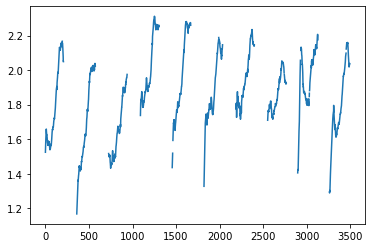

In [37]:
plt.plot(DS_infilled.sea_ice_thickness.where(DS_infilled.sea_ice_thickness > 0).mean(dim = ['x','y']))

In [28]:
import datetime
ds['time'] = datetime.datetime(2010, 10, 20)

In [29]:
ds

<xarray.Dataset>
Dimensions:            (x: 304, y: 448)
Dimensions without coordinates: x, y
Data variables:
    sea_ice_thickness  (y, x) float32 ...
    snow_depth         (y, x) float32 ...
    snow_density       (y, x) float32 ...
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
    freeboard          (y, x) float32 ...
    roughness          (y, x) float32 ...
    ice_con            (y, x) float32 ...
    time               datetime64[ns] 2010-10-20
Attributes:
    Title:        CryoSat-2 sea ice thickness and ancillary data
    Abstract:     This data set contains monthly averaged Arctic sea ice thic...
    Projection:   CryoSat-2 elevation data have a nominal footprint size of 3...
    Institution:  NASA Goddard Space Flight Center
    PI_name:      For questions related to this data set please contact the P...
    References:   A description of the primary methodology used in the retrie...

In [14]:
ds = xr.open_mfdataset(files, combine='nested', concat_dim = 'time')

In [18]:
ds = xr.decode_cf(ds)

In [21]:
attrs = {'units': 'hours since 2010-10-20'}

ds = xr.Dataset({'time': ('time', ds.time, attrs)})

time = xr.decode_cf(ds)

In [22]:
ds["time"] = time.time

In [23]:
ds

<xarray.Dataset>
Dimensions:  (time: 2134)
Coordinates:
  * time     (time) datetime64[ns] 2010-10-20 ... 2011-01-16T21:00:00
Data variables:
    *empty*

In [ ]:
# , combine='nested', concat_dim = 'time'
ds_infilled = ds.resample(time='1D').asfreq()

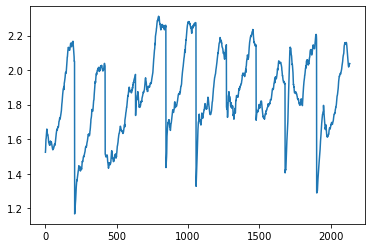

In [14]:
plt.plot(ds.sea_ice_thickness.where(ds.sea_ice_thickness > 0).mean(dim = ['x','y']))

In [28]:
SIT_anom = signal.detrend(ds.sea_ice_thickness.where(ds.sea_ice_thickness > 0).fillna(0), axis=0,type='linear',overwrite_data=True)

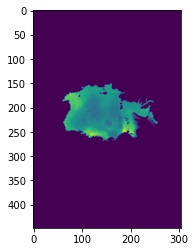

In [32]:
plt.imshow(SIT_anom.std(axis = 0))

In [34]:
def convert_coords(lat, lon, og_data, ccrs_grid):
    grid = ccrs_grid
    coords = grid.transform_points(ccrs.PlateCarree(), 
                                   np.array(lon), 
                                   np.array(lat))
    
    xs = np.ma.masked_invalid(coords[..., 0])
    ys = np.ma.masked_invalid(coords[..., 1])
    data = np.ma.masked_invalid(og_data)
    data.mask = np.logical_or(data.mask, xs.mask, ys.mask)
    
    xs = xs.filled(0)
    ys = ys.filled(0)
    
    return xs,ys,data

# Plotting functions 
def fashion_space(ax):
    ax.set_extent([-180,180,55,90], ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.LAND,facecolor = 'gainsboro', zorder=6)
    ax.gridlines()
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = matplotlib.path.Path(verts * radius + center)
    
    ax.set_boundary(circle, transform=ax.transAxes)
    

In [39]:
lat = ds.lat[0]
lon = ds.lon[0]
data = SIT_anom.std(axis = 0)
nps = ccrs.NorthPolarStereo()

xs,ys,plot_data=convert_coords(lat, lon, data, nps)

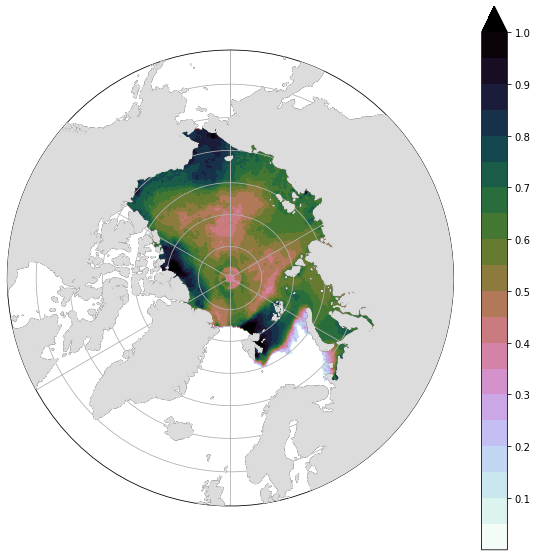

In [42]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection=nps)
fashion_space(ax)
cmap = plt.cm.cubehelix_r
clevs_label = np.linspace(0, 1, 11)
clevs = np.linspace(0.000001,1, 21)
img = ax.contourf(xs, ys, data, clevs, transform=ccrs.NorthPolarStereo(), cmap=cmap, extend = 'max')
cbar2 = fig.colorbar(img, ax=ax, ticks = clevs_label)

In [87]:
FT_SIT = np.fft.rfft(SIT_anom, axis = 0)

In [88]:
ABS_FT_SIT = np.abs(FT_SIT)

In [89]:
POWER = np.square(ABS_FT_SIT)

In [90]:
frequency = np.linspace(0, len(SIT_anom)/2, len(POWER))

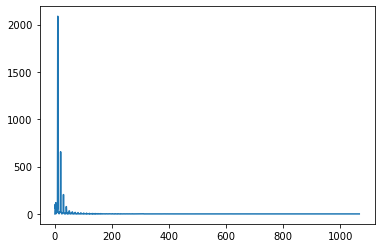

In [72]:
plt.plot(frequency, POWER)
# plt.ylim([0, 10])

In [92]:
np.shape(POWER)

(1068, 448, 304)

In [93]:
np.shape(SIT_anom)

(2134, 448, 304)

In [103]:
mapp = POWER.argmax(axis = 0)

In [105]:
np.shape(map)

(448, 304)

In [106]:
lat = ds.lat[0]
lon = ds.lon[0]
data = mapp
nps = ccrs.NorthPolarStereo()

xs,ys,plot_data=convert_coords(lat, lon, data, nps)

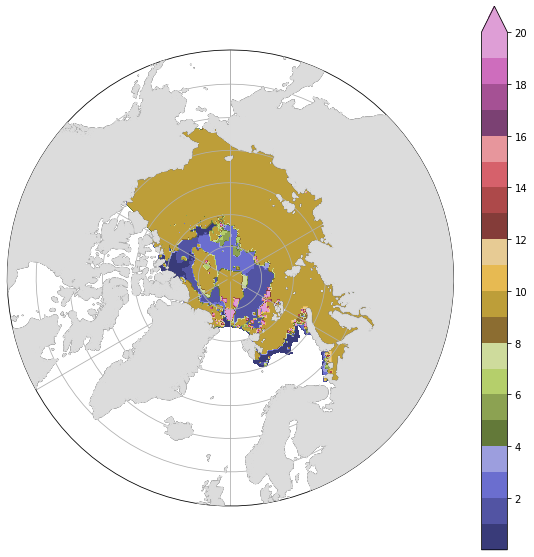

In [117]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection=nps)
fashion_space(ax)
cmap = plt.cm.tab20b
clevs_label = np.linspace(0, 20, 11)
clevs = np.linspace(0.000001,20, 21)
img = ax.contourf(xs, ys, data, clevs, transform=ccrs.NorthPolarStereo(), cmap=cmap, extend = 'max')
cbar2 = fig.colorbar(img, ax=ax, ticks= clevs_label)

In [139]:
1068/(365/2)

5.852054794520548

In [136]:
weekly = POWER[214]

In [137]:
lat = ds.lat[0]
lon = ds.lon[0]
data = weekly
nps = ccrs.NorthPolarStereo()

xs,ys,plot_data=convert_coords(lat, lon, data, nps)

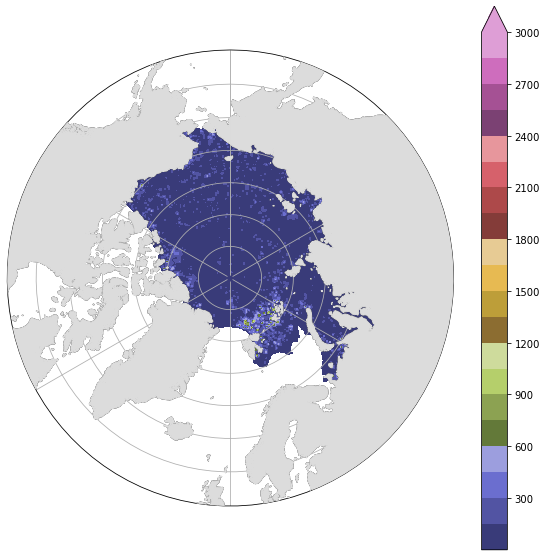

In [138]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection=nps)
fashion_space(ax)
cmap = plt.cm.tab20b
clevs_label = np.linspace(0, 3000, 11)
clevs = np.linspace(0.000001,3000, 21)
img = ax.contourf(xs, ys, data, clevs, transform=ccrs.NorthPolarStereo(), cmap=cmap, extend = 'max')
cbar2 = fig.colorbar(img, ax=ax, ticks= clevs_label)

In [132]:
monthly = POWER[71]

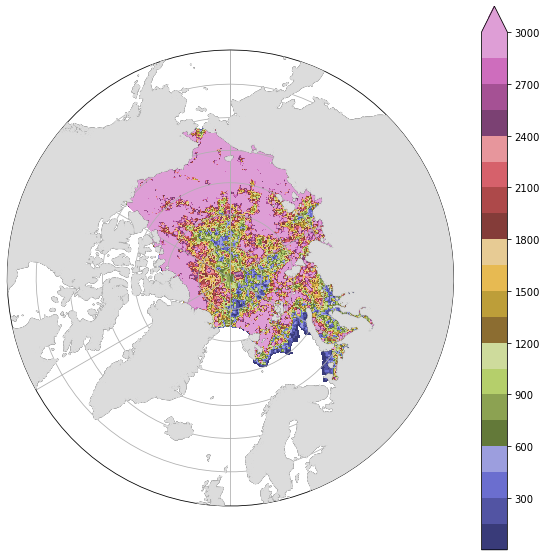

In [134]:
lat = ds.lat[0]
lon = ds.lon[0]
data = monthly
nps = ccrs.NorthPolarStereo()

xs,ys,plot_data=convert_coords(lat, lon, data, nps)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection=nps)
fashion_space(ax)
cmap = plt.cm.tab20b
clevs_label = np.linspace(0, 3000, 11)
clevs = np.linspace(0.000001,3000, 21)
img = ax.contourf(xs, ys, data, clevs, transform=ccrs.NorthPolarStereo(), cmap=cmap, extend = 'max')
cbar2 = fig.colorbar(img, ax=ax, ticks= clevs_label)

In [ ]:
annual = POWER[6]

In [ ]:
lat = ds.lat[0]
lon = ds.lon[0]
data = anunual
nps = ccrs.NorthPolarStereo()

xs,ys,plot_data=convert_coords(lat, lon, data, nps)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection=nps)
fashion_space(ax)
cmap = plt.cm.tab20b
clevs_label = np.linspace(0, 3000, 11)
clevs = np.linspace(0.000001,3000, 21)
img = ax.contourf(xs, ys, data, clevs, transform=ccrs.NorthPolarStereo(), cmap=cmap, extend = 'max')
cbar2 = fig.colorbar(img, ax=ax, ticks= clevs_label)

In [163]:
SIT = ds.sea_ice_thickness.where(ds.sea_ice_thickness > 0).fillna(0)

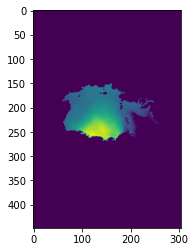

In [164]:
plt.imshow(SIT.mean(axis = 0))

In [165]:
f, Pxx = signal.welch(SIT, fs=1.0, window = 'hann', nperseg=512, detrend = 'constant', axis = 0)

In [ ]:
weather = Pxx[2]

lat = ds.lat[0]
lon = ds.lon[0]
data = weather
nps = ccrs.NorthPolarStereo()

xs,ys,plot_data=convert_coords(lat, lon, data, nps)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection=nps)
fashion_space(ax)
cmap = plt.cm.tab20b
clevs_label = np.linspace(0, 1, 11)
clevs = np.linspace(0.000001,1, 21)
img = ax.contourf(xs, ys, data, clevs, transform=ccrs.NorthPolarStereo(), cmap=cmap, extend = 'max')
cbar2 = fig.colorbar(img, ax=ax, ticks= clevs_label)

In [148]:
f_mean, Pxx_mean = signal.welch(SIT.mean(axis=1).mean(axis=1), fs=1.0, window = 'hann', nperseg=512, detrend = 'constant', axis = 0)

/glade/u/home/mollyw/.conda/envs/single_assimilation/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


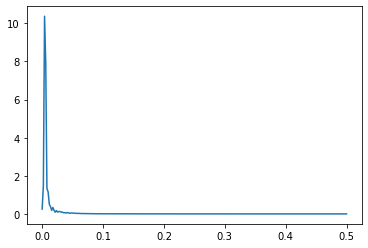

In [150]:
plt.plot(f_mean, Pxx_mean)

In [171]:
f

array([0.        , 0.00195312, 0.00390625, 0.00585938, 0.0078125 ,
       0.00976562, 0.01171875, 0.01367188, 0.015625  , 0.01757812,
       0.01953125, 0.02148438, 0.0234375 , 0.02539062, 0.02734375,
       0.02929688, 0.03125   , 0.03320312, 0.03515625, 0.03710938,
       0.0390625 , 0.04101562, 0.04296875, 0.04492188, 0.046875  ,
       0.04882812, 0.05078125, 0.05273438, 0.0546875 , 0.05664062,
       0.05859375, 0.06054688, 0.0625    , 0.06445312, 0.06640625,
       0.06835938, 0.0703125 , 0.07226562, 0.07421875, 0.07617188,
       0.078125  , 0.08007812, 0.08203125, 0.08398438, 0.0859375 ,
       0.08789062, 0.08984375, 0.09179688, 0.09375   , 0.09570312,
       0.09765625, 0.09960938, 0.1015625 , 0.10351562, 0.10546875,
       0.10742188, 0.109375  , 0.11132812, 0.11328125, 0.11523438,
       0.1171875 , 0.11914062, 0.12109375, 0.12304688, 0.125     ,
       0.12695312, 0.12890625, 0.13085938, 0.1328125 , 0.13476562,
       0.13671875, 0.13867188, 0.140625  , 0.14257812, 0.14453

In [191]:
1/0.00275

363.6363636363637

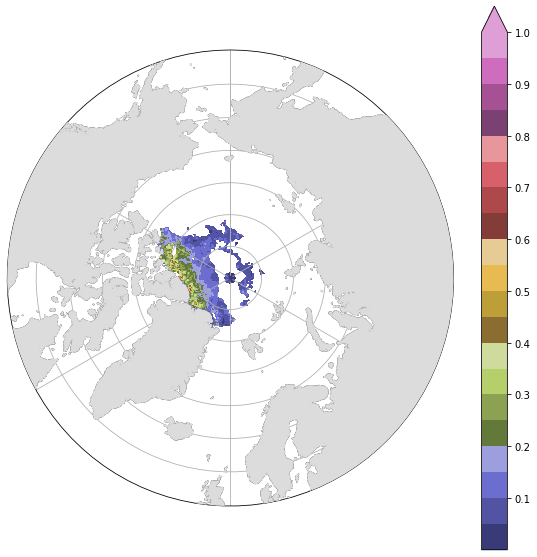

In [159]:
monthly = Pxx[42]

lat = ds.lat[0]
lon = ds.lon[0]
data = monthly
nps = ccrs.NorthPolarStereo()

xs,ys,plot_data=convert_coords(lat, lon, data, nps)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection=nps)
fashion_space(ax)
cmap = plt.cm.tab20b
clevs_label = np.linspace(0, 1, 11)
clevs = np.linspace(0.000001,1, 21)
img = ax.contourf(xs, ys, data, clevs, transform=ccrs.NorthPolarStereo(), cmap=cmap, extend = 'max')
cbar2 = fig.colorbar(img, ax=ax, ticks= clevs_label)

### Reading CS2SMOS

In [31]:
def read_CS2SMOS():
    
    # collect a list of files from scratch
    files = sorted(glob.glob('/glade/scratch/mollyw/external_data/CS2SMOS/CS2SMOSNH_25KM_EASE2_20*[0-9]*.nc'))
    
    # open the files and concatenate them along shared dimensions
    ds = xr.open_mfdataset(files)
    
    # resample to infill months that are missing 
    ds_infilled = ds.resample(time = '1D').asfreq()
    
    return ds_infilled

In [39]:
files = sorted(glob.glob('/glade/scratch/mollyw/external_data/CS2SMOS/CS2SMOSNH_25KM_EASE2_20*[0-9]*.nc'))
# files

In [40]:
ds = xr.open_mfdataset(files)

In [45]:
ds

<xarray.Dataset>
Dimensions:                          (nv: 2, time: 1773, xc: 432, yc: 432)
Coordinates:
  * time                             (time) datetime64[ns] 2011-01-04T12:00:0...
  * xc                               (xc) float32 -5.388e+03 ... 5.388e+03
  * yc                               (yc) float32 5.388e+03 ... -5.388e+03
    lon                              (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
    lat                              (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    Lambert_Azimuthal_Grid           (time) int32 -2147483647 ... -2147483647
    time_bnds                        (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    analysis_sea_ice_thickness       (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    background_sea_ice_thickness     (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    weighted_mean_sea_ice_thickness  (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    innovation                       (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    sea_ice_concentration            (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    sea_ice_type                     (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    correlation_length_scale         (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    analysis_sea_ice_thickness_unc   (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    smos_sea_ice_thickness           (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
    cryosat_sea_ice_thickness        (time, yc, xc) float64 dask.array<chunksize=(1, 432, 432), meta=np.ndarray>
Attributes: (12/32)
    title:                     Sea Ice Thickness derived from merging CryoSat...
    description:               Weekly Arctic sea-ice thickness derived from C...
    summary:                   Weekly Arctic sea-ice thickness derived from C...
    keywords:                  Cryosphere > Sea Ice > Sea Ice Thickness
    product_version:           204
    processing_mode:           r
    ...                        ...
    creator_url:               www.awi.de
    contributor_name:          Robert Ricker, Stefan Hendricks, Xiangshan Tia...
    contributor_role:          PrincipalInvestigator, Author, Author, Author
    publisher_email:           cs2smos-support@awi.de
    publisher_url:             https://spaces.awi.de/confluence/x/DwVmEQ
    references:                Ricker, R., Hendricks, S., Kaleschke, L., Tian...

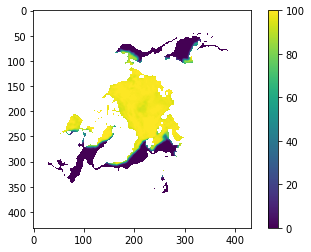

In [44]:
plt.imshow(ds.sea_ice_concentration[10])
plt.colorbar()

In [35]:
da = ds.analysis_sea_ice_thickness.where(ds.sea_ice_type == 3)

In [ ]:
xr.decode_cf(ds)

In [7]:
ds_infilled = ds.resample(time='1D').asfreq()

In [9]:
da = ds_infilled.analysis_sea_ice_thickness

In [11]:
da

<xarray.DataArray 'analysis_sea_ice_thickness' (time: 3653, yc: 432, xc: 432)>
dask.array<where, shape=(3653, 432, 432), dtype=float64, chunksize=(189, 432, 432), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2011-01-04 2011-01-05 ... 2021-01-03
  * xc       (xc) float32 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float32 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
    lon      (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>

/glade/u/home/mollyw/.conda/envs/markov_model/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


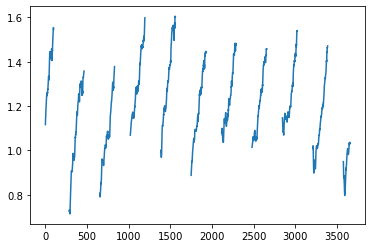

In [10]:
plt.plot(da.mean(dim = ['xc','yc']))

/glade/u/home/mollyw/.conda/envs/markov_model/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


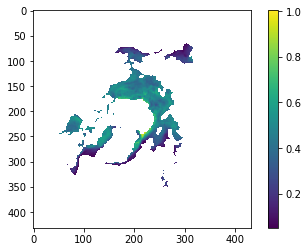

In [15]:
plt.imshow(da.mean(dim = 'time'))
plt.colorbar()

In [16]:
da = ds.cryosat_sea_ice_thickness

/glade/u/home/mollyw/.conda/envs/markov_model/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


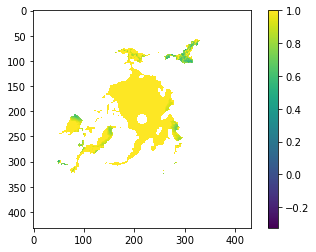

In [18]:
plt.imshow(da.mean(dim = 'time'), vmax = 1)
plt.colorbar()

In [20]:
da = ds.analysis_sea_ice_thickness

/glade/u/home/mollyw/.conda/envs/markov_model/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


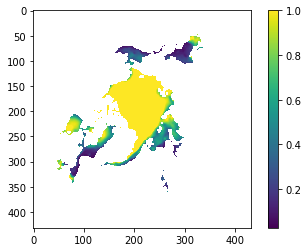

In [21]:
plt.imshow(da.mean(dim = 'time'), vmax = 1)
plt.colorbar()

In [22]:
da = ds.innovation

/glade/u/home/mollyw/.conda/envs/markov_model/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


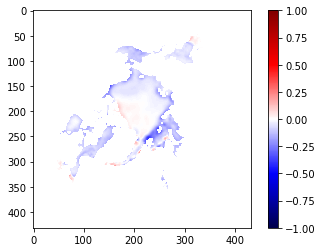

In [25]:
plt.imshow(da.mean(dim = 'time'), vmin = -1, vmax = 1, cmap= plt.cm.seismic)
plt.colorbar()

In [28]:
da = ds.analysis_sea_ice_thickness_unc

/glade/u/home/mollyw/.conda/envs/markov_model/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


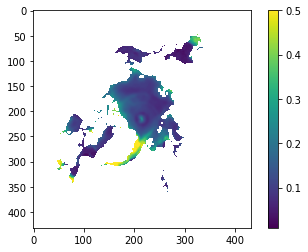

In [31]:
plt.imshow(da.mean(dim = 'time'), vmax = 0.5)
plt.colorbar()